## Python


## Loading data

Let's start by access to our dataset!

For that we need to:
1. Import libraries
2. Load the dataset - use the methods of those libraries

**Import libraries**


These methods are stored in ***libraries*** that can be imported using `import`.

For today:
- ***pandas*** - to handle data (dataframes, some basic stats, etc.)
- ***pyplot*** (from matplotlib library) - to plot basic graphs and visualizations

The code to do it:

In [1]:
import pandas as pd

from matplotlib import pyplot as plt
%matplotlib inline

**Load dataset to a dataframe**

We will load the dataset using Pandas, the [read_csv](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html) method

In [2]:
# Load the csv called covid19.csv into a DataFrame called df
df = pd.read_csv("covid19.csv")

This dataset will now be a [Pandas DataFrame](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html).

### pandas DataFrames

Is like a **table**, a bit like spreadsheets...

...with lots of **automatic methods** (attributes) to ease our lifes and simple to use:

**DataFrame_name**.*method_name*()

## Understanding data

Before we start using powerful models, we should start by understanding our dataset

### Generalities

The first thing to do with any dataset is... to look at it! 

Let's use [head](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.head.html) to look at the first 5 lines of our DataFrame

In [3]:
df.head(5)

,Country/Region,Date (yyyy/mm/dd),Confirmed cases,Death cases,Recovered cases
0,Afghanistan,2020-01-22,0,0,0
1,Afghanistan,2020-01-23,0,0,0
2,Afghanistan,2020-01-24,0,0,0
3,Afghanistan,2020-01-25,0,0,0
4,Afghanistan,2020-01-26,0,0,0


We can also look at the final 5 lines using [tail](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.tail.html)

In [4]:
# Just a first overview: print the tail of the dataset
df.tail(5)

,Country/Region,Date (yyyy/mm/dd),Confirmed cases,Death cases,Recovered cases
59014,Zimbabwe,2020-11-21,9172,265,8235
59015,Zimbabwe,2020-11-22,9220,268,8250
59016,Zimbabwe,2020-11-23,9308,273,8288
59017,Zimbabwe,2020-11-24,9398,274,8297
59018,Zimbabwe,2020-11-25,9508,274,8336


How many rows and columns do we have? 

We can find out with the [.shape](http://pandas.pydata.org/pandas-docs/version/0.17.0/generated/pandas.DataFrame.shape.html) command

In [5]:
df.shape

(59019, 5)

What are the columns?

In [6]:
df.columns

Index(['Country/Region', 'Date (yyyy/mm/dd)', 'Confirmed cases', 'Death cases',
       'Recovered cases'],
      dtype='object')

**Rename columns**

We can simplify "complex" names by using [rename](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rename.html).

- 'Country/Region' to 'country'
- 'Date (yyyy/mm/dd)' to 'date'
- 'Confirmed cases' to 'confirmed'

Let's see how we can do it:

In [7]:
df = df.rename(columns={
    'Country/Region': 'country',
    'Date (yyyy/mm/dd)': 'date',
    'Confirmed cases': 'confirmed'
    })

In [8]:
df.columns

Index(['country', 'date', 'confirmed', 'Death cases', 'Recovered cases'], dtype='object')

**Column types**

All the columns of a dataset have a specific type.
It can be, among others:
- int64, that represent integers (numeric)
- object, that represent categorical variables (as countries).
- datetime, to represent dates

It can be checked using [dtypes](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dtypes.html), as follows:

In [9]:
# Check types
df.dtypes

country            object
date               object
confirmed           int64
Death cases         int64
Recovered cases     int64
dtype: object

### Nulls

Many datasets have nulls (empty values) that needed to be treated. Let's check if our dataframe has nulls:

In [10]:
df.isnull().sum()

country            0
date               0
confirmed          0
Death cases        0
Recovered cases    0
dtype: int64

### Create subsets

We can select a specific column, by using brackets notation:

In [11]:
# subset the column 'country'
# and save it into a Pandas Series called countries
countries = df['country']

**countries** is now a Pandas Series (a fancy name for "column").


**Find unique values**

We can use [nunique](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.nunique.html) to look for unique values on the column. In this case, it means the number of countries we have in the dataset

In [12]:
countries.nunique()

191

**Change column types**

We can also change a column type.

Let's change 'date' to datetime64 type using `pd.to_datetime`

In [13]:
df["date"] = pd.to_datetime(df["date"])

In [14]:
# print the types to check it
df.dtypes

country                    object
date               datetime64[ns]
confirmed                   int64
Death cases                 int64
Recovered cases             int64
dtype: object

#### Some statistics

For numeric columns (such as 'date' or 'Confirmed cases'), we can get a bunch of descriptive analysis (such as minimum, maximum, mean, mode, etc.):

In [15]:
# Minimum value of 'date' (the earliest day): 
df['date'].min()

Timestamp('2020-01-22 00:00:00')

In [16]:
# Maximum value of 'date' (the latest day): 
df['date'].max()

Timestamp('2020-11-25 00:00:00')

We can also use Python `print()` function to display something prettier

In [17]:
print('The earliest date of the dataset is:', df['date'].min())

The earliest date of the dataset is: 2020-01-22 00:00:00


### Operations with columns

Still with numeric columns, we can make operations between columns and create new columns from there.

In this case, we want to create a new column 'Closed cases'. We can do it by summing the columns 'Death cases' and 'Recovered cases':

In [18]:
df['Closed cases'] = df['Death cases'] + df['Recovered cases']

With datetime type columns we can also make operations.

The difference between two dates is accomplished by adding `.dt.days` at the difference operation:

In [19]:
df['days'] = (df['date'] - df['date'].min()).dt.days

### Groupby

Get the cumulative closed cases worldwide per day. 

So, we need to **groupby** the 'date', and then take the **sum** of each group for 'Closed cases'

In [20]:
world_closed_cases = df.groupby('date')['Closed cases'].sum()

In [21]:
# That's how it looks like
print(world_closed_cases)

date
2020-01-22          45
2020-01-23          48
2020-01-24          62
2020-01-25          81
2020-01-26         108
                ...   
2020-11-21    38625835
2020-11-22    38905003
2020-11-23    39323422
2020-11-24    39707660
2020-11-25    40156667
Name: Closed cases, Length: 309, dtype: int64


### Plot

Easier to understand data by just plot things. In this case, we can do it, by adding a **.plot** at the end.

> Inside the parentheses we can define which [kind](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.html?highlight=kind) of chart we want:
> - 'line' for a line chart
> - 'barh' for a horizontal bar chart

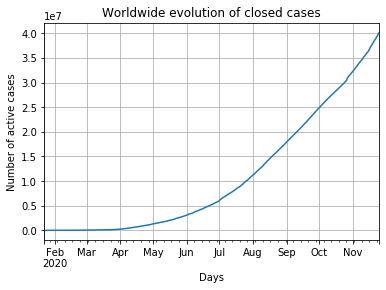

In [22]:
world_closed_cases.plot(kind='line')

# below it's just styling
plt.title('Worldwide evolution of closed cases')
plt.ylabel('Number of active cases')
plt.grid()
plt.xlabel('Days')
plt.show()

### Dataframe subset

When we want to make a more specific analysis, we can create a subset of the dataset using a filter with the bracket notation (it goes inside the brackets).

Let's get a dataset about Portugal:

In [23]:
portugal = df[ df['country'] == 'Portugal' ]

In [24]:
# print portugal dataframe
portugal

,country,date,confirmed,Death cases,Recovered cases,Closed cases,days
42642,Portugal,2020-01-22,0,0,0,0,0
42643,Portugal,2020-01-23,0,0,0,0,1
42644,Portugal,2020-01-24,0,0,0,0,2
42645,Portugal,2020-01-25,0,0,0,0,3
42646,Portugal,2020-01-26,0,0,0,0,4
...,...,...,...,...,...,...,...
42946,Portugal,2020-11-21,255970,3824,169379,173203,304
42947,Portugal,2020-11-22,260758,3897,172919,176816,305
42948,Portugal,2020-11-23,264802,3971,176827,180798,306
42949,Portugal,2020-11-24,268721,4056,184233,188289,307


Another example on how to filter a dataframe:
* Create **latest_day_df** dataframe that has all the data regarding the latest day of the dataset

In [25]:
latest_date_df = df[df['date'] == df['date'].max()]

In [26]:
latest_date_df.head()

,country,date,confirmed,Death cases,Recovered cases,Closed cases,days
308,Afghanistan,2020-11-25,45384,1728,36145,37873,308
617,Albania,2020-11-25,34944,743,17031,17774,308
926,Algeria,2020-11-25,78025,2329,50712,53041,308
1235,Andorra,2020-11-25,6428,76,5542,5618,308
1544,Angola,2020-11-25,14821,340,7517,7857,308


**Sort values**

Now, imagine we want to figure out the top 7 countries in terms of recovered cases.

For that we need to sort countries by closed cases:
- use **sort_values()**
- refer the column we want to sort by
- specify if we want to in ascending order (or not) by setting **ascending** to **True** or **False** (by default ascending is **True**)
.Descending == ascending True


In [27]:
top = latest_date_df.sort_values(by = 'Closed cases', ascending = False)

**Get the top**

And then select the top we want:
- use `head(7)` where 7 refers to the number of lines we want

In [28]:
top_7 = top.head(7)

# print top 7 dataset:
top_7

,country,date,confirmed,Death cases,Recovered cases,Closed cases,days
24719,India,2020-11-25,9266705,135223,8679138,8814361,308
7415,Brazil,2020-11-25,6166606,170769,5534010,5704779,308
54692,US,2020-11-25,12772653,262222,4835956,5098178,308
43877,Russia,2020-11-25,2144229,37173,1646737,1683910,308
2162,Argentina,2020-11-25,1390388,37714,1217284,1254998,308
11741,Colombia,2020-11-25,1270991,35860,1174959,1210819,308
42023,Peru,2020-11-25,952439,35685,884747,920432,308


**Another way of plotting:**

Finally, let's plot the top 7 countries in terms of closed cases:

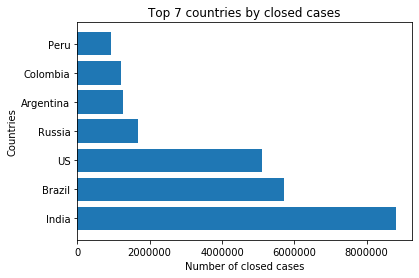

In [29]:
plt.barh(top_7['country'], top_7['Closed cases'])

# just styling:
plt.xlabel('Number of closed cases')
plt.ylabel('Countries')
plt.title('Top 7 countries by closed cases')
plt.show()

# Making predictions


A time series is **a sequence taken at successive points in time (discrete-time data)**

| |  | |
| - | :-----: | - |
| | ![](https://developers.google.com/earth-engine/images/Charts_series_regions.png) | |
| | | |



## Time series forecasting

*Time series forecasting is the use of a model to predict future values based on previously observed values.*

## Modeling

* Understand our data
* "Learn" parameters for functions that describe the behaviour of your country - sounds tricky but it isn't.
* Based on what you have learnt, try to guess the next days.

### Ok, what about now? 

* Focus on intution
* Data should tell a story - so do your models
* Prefer simple explainable models over black-box and highly complicated

![](https://qph.fs.quoracdn.net/main-qimg-82a2512d1942859d81dcaf5db6c5be48)

### What happened there

![](https://cdn.kastatic.org/googleusercontent/ovqBFMBrGMZ1PfJ6XMADhigWzTDP5AaEmaEIAnNKjwiOlLuGd46fET8QeRqB9LZ9XVpvoX85lbz0YIYsV-98UTCs)

There are many different and complex models to do *time series forecasting*.

For simplicity, today we will focus on just 3 different type of models:
* [Exponential](https://en.wikipedia.org/wiki/Exponential_growth)
* [Logistic](https://en.wikipedia.org/wiki/Logistic_function)
* [Gompertz](https://en.wikipedia.org/wiki/Gompertz_function)

### Exponential

A quantity increase over time indefinitely

| |  | |
| - | :-----: | - |
| | ![](https://www.chebfun.org/examples/applics/img/Gompertz_01.png) | |
| | | |

### Logistic

Describes growth as being slowest at the start and end of a given time period (s-curve)

| |  | |
| - | :-----: | - |
| | ![](https://www.chebfun.org/examples/applics/img/Gompertz_02.png) | |
| | | |

### Gompertz

Similar to logistic but the decrease at the end can have a different rate than the increase at the start

| |  | |
| - | :-----: | - |
| | ![](https://www.chebfun.org/examples/applics/img/Gompertz_04.png) | |
| | | |

Library called ***hackathome*** that we created for today with three models.

Its usage is similar to [scikit-learn library](http://scikit-learn.org/stable/index.html) - the standard library for getting started with Machine Learning in Python (for its simplicity and excellent community).

To ilustrate the use of our library, we will use the **Gompertz** model.

Main actions:
* A-Import models
* B-Instatiate a model
* C-...some extras...
* D-Fitting a model
* E-Making predictions
* F-Observing model / predictions

#### A-Import a model
# importing all the models
from hackathome import Exponential, Logistic, Gompertz

In [33]:
from hackathome import Gompertz

#### B-Instatiate a model

We start by creating a variable (in this case, we call it **model** that will take our model)

In [34]:
model = Gompertz()

#### C-Some Extra: An extra: Select data from the second wave

If we want to predict how this second wave evolutes, we should select the data **ONLY FROM THE SECOND WAVE** so we can accurately train our models!

This is one of the parameters you should "play with" so you can improve your predictions.

In [35]:
first_day_to_count = "2020-08-01"

df_to_predict = df[df.date >= pd.to_datetime(first_day_to_count)]

#### Another extra: Select a country from our dataset

This doesn't exist in *scikit learn library*. With lots of love, we made it to ease your life.

It aims to select our country from the training data (df_to_predict)

In [36]:
country = model.select_country(df_to_predict, 'Portugal')

#### D-Fitting a model.Fit a model

Now we **fit** the model, passing it the X (**days**) and the Y (**confirmed** cases in our country) from the data we already know.

In [37]:
model.fit(country.days, country.confirmed)

#### E-Making predictions

We can now make predictions, using the **predict** method.

The method needs to know the number of days we want to predict. In this case, we chose 7 days.

In [38]:
pred = model.predict(7)

#### F-Observing model / predictions

We created a method called 'visualize_curve' to help us check the model's behaviour.

We need to pass through the method:
* our country info (**country**)
* if we want to see our model including the predictions (**predictions = True**) or excluding the predictions (**predictions = False**).

**Excluding predictions:**

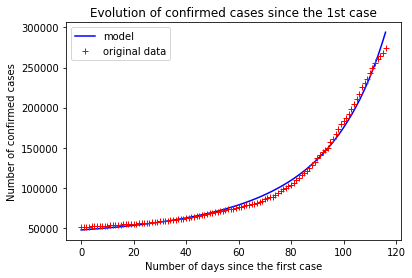

In [39]:
# Excluding the predictions
model.visualize_curve(country, predictions=False)

**Including predictions:**

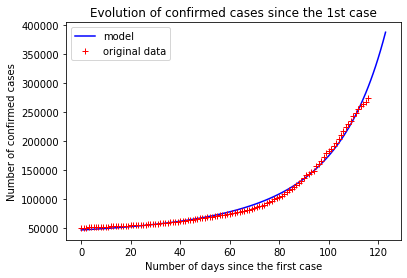

In [40]:
# Including the predictions
model.visualize_curve(country, predictions=True)

Don't worry, we grouped in one cell all steps of how to make a prediction on the "classes" tab of the platform!


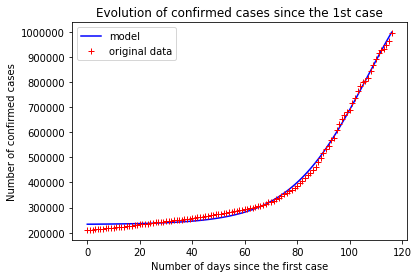

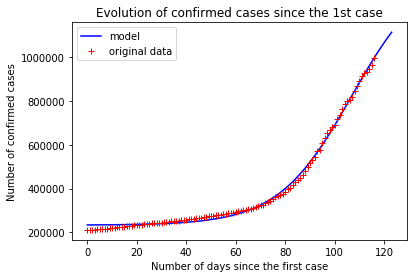

In [41]:


# data about predictions
my_country = "Germany"
nr_days = 7
first_day_to_count = "2020-08-01"
df_to_predict = df[df.date >= pd.to_datetime(first_day_to_count)]

# instantiate your model (in this case, we are using Gompertz)
model = Logistic()

# select your country and after which number of confirmed cases (we use 150 in this case)
country = model.select_country(df_to_predict, my_country)

# fit your model
model.fit(country.days, country.confirmed)

# visualize how good it is
model.visualize_curve(country, predictions=False)

# predict for the next days
pred = model.predict(nr_days)

# visualize your predictions
model.visualize_curve(country, predictions=True)

Finally, let's **create a submission file**

But first take a look at our predictions:

In [42]:
pred.head()

,confirmed,days
0,233739.005487,0
1,233802.316532,1
2,233870.009777,2
3,233942.387990,3
4,234019.774773,4


Our submission file must have the columns: **country**, **days** or **date**(the days we want to predict) and **confirmed** cases, so:

- Add one column to our dataset with the name of the country:

In [43]:
pred["country"] = my_country

- Get only the days we want to predict (the last 7 days of the dataframe):

In [44]:
predictions = pred.tail(nr_days)

- Let's print it:

In [45]:
predictions

,confirmed,days,country
117,1.016274e+06,117,Germany
118,1.033727e+06,118,Germany
119,1.050766e+06,119,Germany
120,1.067370e+06,120,Germany
121,1.083520e+06,121,Germany
122,1.099198e+06,122,Germany
123,1.114392e+06,123,Germany


- Send predictions to 'predictions.csv' file using the method "to_csv":

In [46]:
predictions.to_csv('./predictions.csv', index=False)